# 1. 데이터 불러오기와 데이터셋 나누기

In [1]:
#일반적인 경고 메세지는 무시함
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Pandas 라이브러리를 선언함
import pandas as pd

In [3]:
#One-hot Coding과 연속데이터 스케일링을 수행한 Fvote.cav 파일을 불러옴
data=pd.read_csv('Fvote.csv', encoding='utf-8')

In [4]:
#입력에 해당하는 feature들을 X로 저장함
X=data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 
        'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income', 
        'age', 'score_gov', 'score_progress', 'score_intention']]

In [5]:
#출력에 해당하는 레이블 중에서 vote만 y로 저장함
y=data[['vote']]

In [6]:
#데이터를 Train와 Test 셋으로 분리하기 위한 라이브러리를 선언함
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42 )

# 2. Grid Search 

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10]}

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)

In [12]:
grid_search.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [13]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'n_neighbors': 9}


In [14]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.646


In [15]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.811


In [16]:
result_grid= pd.DataFrame(grid_search.cv_results_)

In [17]:
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002394,4.877801e-04,0.001795,0.000399,1,{'n_neighbors': 1},0.62500,0.53125,0.50000,0.451613,...,0.518987,0.059264,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.002593,4.888115e-04,0.001596,0.000488,2,{'n_neighbors': 2},0.50000,0.46875,0.40625,0.354839,...,0.424051,0.053338,10,0.722222,0.722222,0.682540,0.779528,0.716535,0.724609,0.031185
2,0.001995,7.136645e-07,0.001795,0.000400,3,{'n_neighbors': 3},0.65625,0.62500,0.53125,0.451613,...,0.550633,0.079080,5,0.753968,0.777778,0.801587,0.803150,0.748031,0.776903,0.023059
3,0.002393,4.889476e-04,0.001596,0.000489,4,{'n_neighbors': 4},0.59375,0.43750,0.37500,0.419355,...,0.462025,0.074972,9,0.658730,0.730159,0.738095,0.740157,0.700787,0.713586,0.030836
4,0.001995,5.519789e-07,0.001596,0.000489,5,{'n_neighbors': 5},0.65625,0.50000,0.62500,0.516129,...,0.563291,0.064850,4,0.690476,0.714286,0.730159,0.724409,0.700787,0.712023,0.014683
5,0.001994,7.921814e-07,0.001396,0.000489,6,{'n_neighbors': 6},0.59375,0.40625,0.53125,0.548387,...,0.512658,0.064094,8,0.666667,0.706349,0.730159,0.653543,0.685039,0.688351,0.027439
6,0.002394,4.889280e-04,0.001197,0.000399,7,{'n_neighbors': 7},0.59375,0.56250,0.65625,0.548387,...,0.588608,0.037415,3,0.706349,0.682540,0.714286,0.685039,0.700787,0.697800,0.012243
7,0.002593,7.985355e-04,0.001197,0.000399,8,{'n_neighbors': 8},0.56250,0.50000,0.62500,0.516129,...,0.544304,0.045771,6,0.666667,0.674603,0.690476,0.669291,0.685039,0.677215,0.009143
8,0.001995,1.907349e-07,0.001796,0.000399,9,{'n_neighbors': 9},0.68750,0.56250,0.65625,0.645161,...,0.645570,0.044450,1,0.714286,0.714286,0.706349,0.692913,0.685039,0.702575,0.011742
9,0.002194,3.988982e-04,0.001397,0.000489,10,{'n_neighbors': 10},0.65625,0.59375,0.65625,0.645161,...,0.645570,0.028091,1,0.682540,0.690476,0.730159,0.622047,0.708661,0.686777,0.036284


In [18]:
result_grid.to_csv('result_grid.csv', sep=',', encoding='utf-8')

In [19]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_test_score'], label="Test")
plt.legend()

# 3. Random Search

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
from scipy.stats import randint

In [22]:
param_distribs = {'n_neighbors': randint(low=1, high=20)}

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
random_search=RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distribs, cv=5,return_train_score=True)

In [25]:
random_search.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000270EE45F6D8>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring=None, verbose=0)

In [26]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'n_neighbors': 13}


In [27]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.690


In [28]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.774


In [29]:
result_random = random_search.cv_results_

In [30]:
result_random=pd.DataFrame(result_random)

In [31]:
result_random.to_csv('result_random.csv', sep=',', encoding='utf-8')

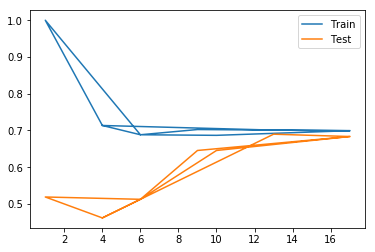

In [32]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_n_neighbors'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_n_neighbors'], result_random['mean_test_score'], label="Test")
plt.legend()

# 4. 모델평가

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn3=KNeighborsClassifier(n_neighbors=9)

In [35]:
knn3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [36]:
from sklearn.metrics import confusion_matrix
# Confusion matrix에서
# [정확도]Accuracy =(TN + TP) / Total
# [정밀도]Precision = TP / (TP + FP)
# [재현율]Recall = TP / (TP + FN)
# f-score = 2 / ((1 / precision) + (1 / recall))

In [37]:
pred_train=knn3.predict(X_train)

In [38]:
confusion_train=confusion_matrix(y_train, pred_train)

In [39]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[  7  41]
 [  2 108]]


In [40]:
pred_test=knn3.predict(X_test)

In [41]:
confusion_test=confusion_matrix(y_test, pred_test)

In [42]:
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[ 5  8]
 [ 2 38]]


In [43]:
from sklearn.metrics import f1_score

In [44]:
TP=38
FP=8
FN=2
TN=5

In [45]:
#precision
precision=TP/(TP+FP)
precision

0.8260869565217391

In [46]:
#recall
recall=TP/(TP+FN)
recall

0.95

In [47]:
f_score=2/((1/precision)+(1/recall))
f_score

0.8837209302325582

In [48]:
f1=f1_score(y_test, pred_test)

In [50]:
print("f1 score:  ", f1)

f1 score:   0.8837209302325583


In [51]:
from sklearn.metrics import classification_report

In [52]:
cfreport=classification_report(y_test, pred_test)
#classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False)[source]

In [53]:
cfreport

'              precision    recall  f1-score   support\n\n           0       0.71      0.38      0.50        13\n           1       0.83      0.95      0.88        40\n\n    accuracy                           0.81        53\n   macro avg       0.77      0.67      0.69        53\nweighted avg       0.80      0.81      0.79        53\n'

In [54]:
print("분류예측 레포트:\n", cfreport)
# support : the number of occurrences of each class in y_true
# micro average (averaging the total TP, FN and FP)
# macro average (averaging the unweighted mean per label)
# weighted average (averaging the support-weighted mean per label)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.71      0.38      0.50        13
           1       0.83      0.95      0.88        40

    accuracy                           0.81        53
   macro avg       0.77      0.67      0.69        53
weighted avg       0.80      0.81      0.79        53

